Import Libraries

In [220]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [121]:
from google.colab import files
files.upload()

{}

In [221]:
Drink=pd.read_excel('Drink.xlsx')

Print Data

In [222]:
Drink

,Product,Calories,Sodium,Caffeine,Price
0,1,144,15,4.7,0.43
1,2,151,19,4.9,0.43
2,3,157,15,4.9,0.48
3,4,170,7,5.2,0.73
4,5,152,11,5.0,0.77
5,6,145,23,4.6,0.28
6,7,175,24,5.5,0.40
7,8,149,27,4.7,0.42
8,9,99,10,4.3,0.43
9,10,113,8,3.7,0.44


In [223]:
Drink.dtypes

Product       int64
Calories      int64
Sodium        int64
Caffeine    float64
Price       float64
dtype: object

In [224]:
Drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   20 non-null     int64  
 1   Calories  20 non-null     int64  
 2   Sodium    20 non-null     int64  
 3   Caffeine  20 non-null     float64
 4   Price     20 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 928.0 bytes


* Removing the Duplicates if any

In [225]:
Drink.duplicated().sum()
Drink.drop_duplicates(inplace=True)

In [226]:
Drink.head()

,Product,Calories,Sodium,Caffeine,Price
0,1,144,15,4.7,0.43
1,2,151,19,4.9,0.43
2,3,157,15,4.9,0.48
3,4,170,7,5.2,0.73
4,5,152,11,5.0,0.77


* Print column names

In [227]:
Drink.columns

Index(['Product', 'Calories', 'Sodium', 'Caffeine', 'Price'], dtype='object')

In [228]:
Drink.describe()

,Product,Calories,Sodium,Caffeine,Price
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,132.400000,14.950000,4.440000,0.496500
std,5.91608,30.257491,6.581273,0.759778,0.143757
min,1.00000,68.000000,6.000000,2.300000,0.280000
25%,5.75000,110.250000,9.500000,4.200000,0.430000
50%,10.50000,144.000000,15.000000,4.650000,0.440000
75%,15.25000,150.250000,19.000000,4.900000,0.485000
max,20.00000,175.000000,27.000000,5.500000,0.790000


Data Cleaning

In [229]:
Drink.isnull().sum()
#check for the null values in each column

Product     0
Calories    0
Sodium      0
Caffeine    0
Price       0
dtype: int64

Datanya Clean

Questions and Data Visualizations

In [230]:
Drink['Product'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

* Product Visualization

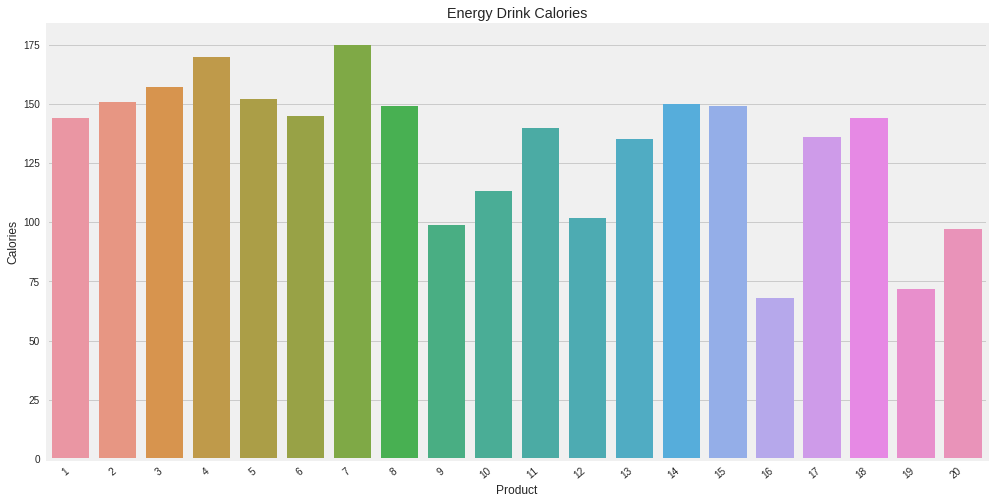

In [231]:
#To see which drink has the highest calories 
plt.figure(figsize=(15, 8))
sns.barplot(x="Product", y="Calories", data=Drink)
plt.xticks(rotation=40, ha='right')
plt.title("Energy Drink Calories")
plt.show()

Product 8 have the highet calories

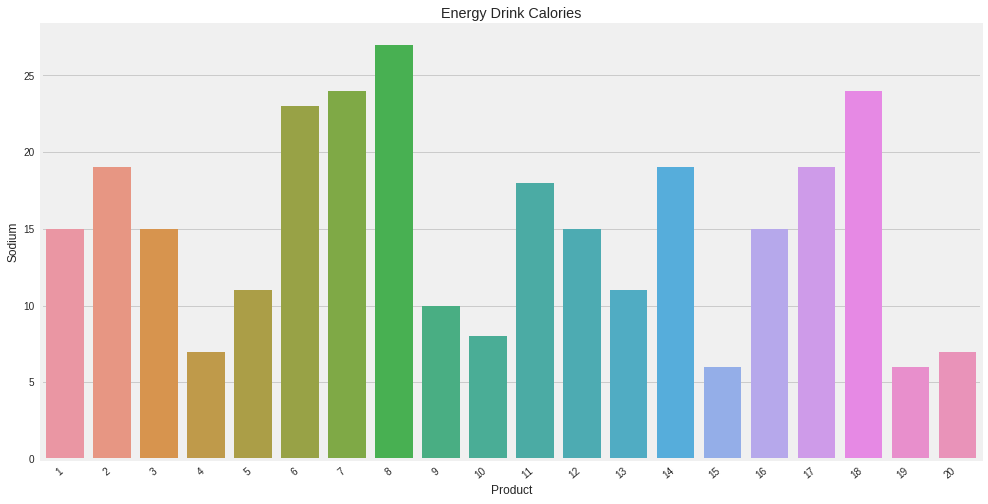

In [232]:
#To see which drink has the highest sodium
plt.figure(figsize=(15, 8))
sns.barplot(x="Product", y="Sodium", data=Drink)
plt.xticks(rotation=40, ha='right')
plt.title("Energy Drink Calories")
plt.show()

Product 8 have the highest Sodium

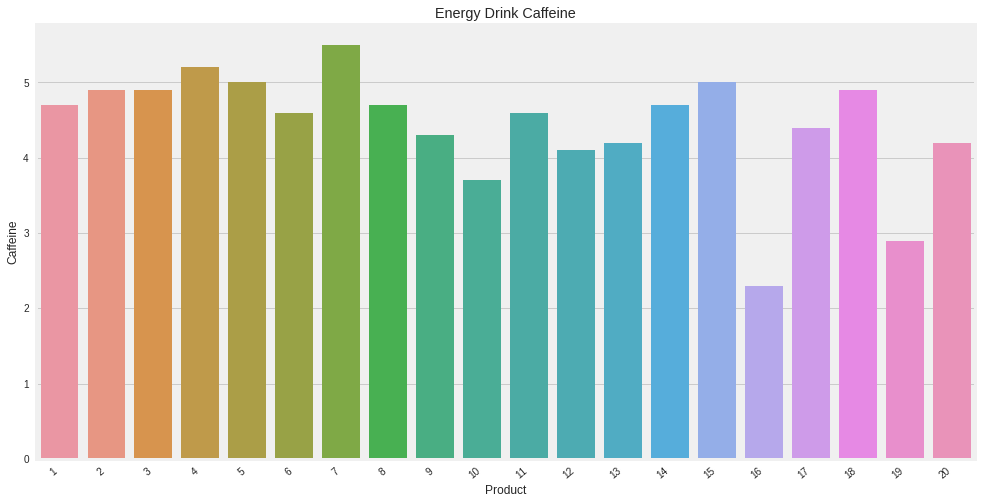

In [233]:
#To see which drink has the highest Caffeine
plt.figure(figsize=(15, 8))
sns.barplot(x="Product", y="Caffeine", data=Drink)
plt.xticks(rotation=40, ha='right')
plt.title("Energy Drink Caffeine")
plt.show()

Product 8 have the highest Caffeine

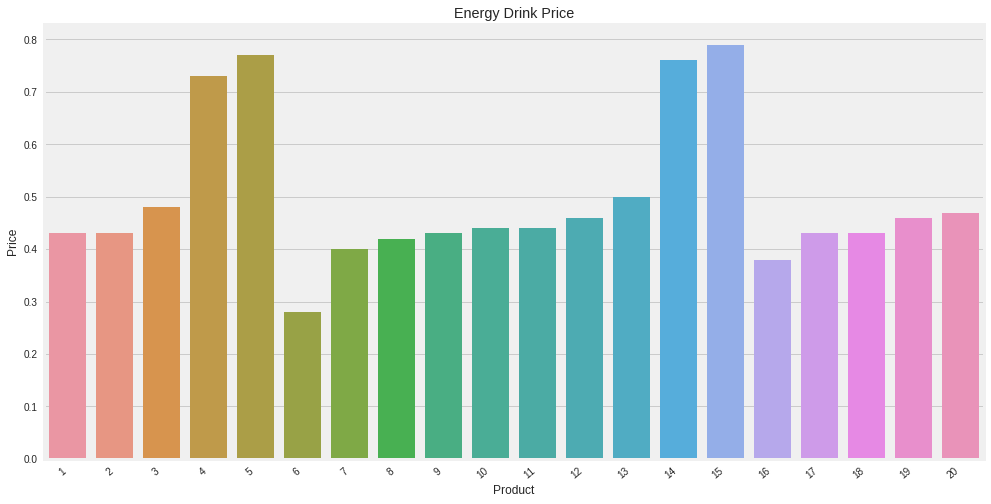

In [234]:
#To see which drink has the highest Price
plt.figure(figsize=(15, 8))
sns.barplot(x="Product", y="Price", data=Drink)
plt.xticks(rotation=40, ha='right')
plt.title("Energy Drink Price")
plt.show()

Product 15 have the highest Price

Energy Drink Data Correlation

In [235]:
Drink.corr()

,Product,Calories,Sodium,Caffeine,Price
Product,1.000000,-0.583633,-0.189924,-0.514032,-0.002166
Calories,-0.583633,1.000000,0.412420,0.920990,0.323892
Sodium,-0.189924,0.412420,1.000000,0.321454,-0.451353
Caffeine,-0.514032,0.920990,0.321454,1.000000,0.331913
Price,-0.002166,0.323892,-0.451353,0.331913,1.000000


Index(['Product', 'Calories', 'Sodium', 'Caffeine', 'Price'], dtype='object')

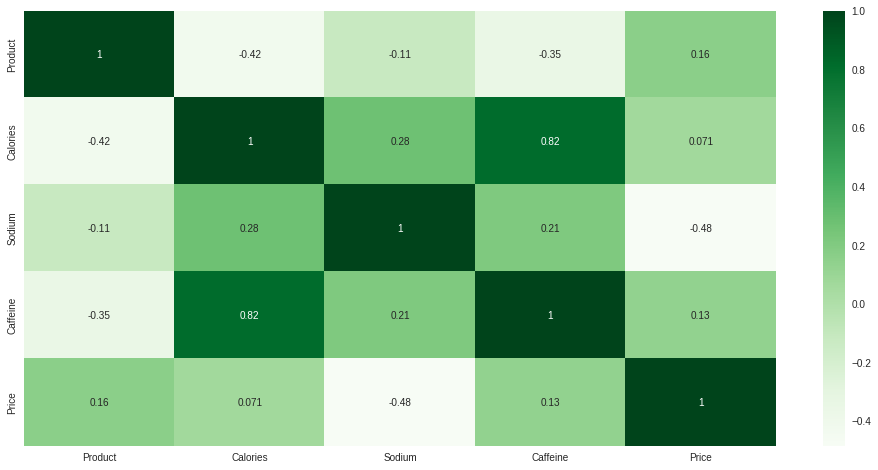

In [236]:
#Get correlation between different variables 
corr = Drink.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cmap="Greens")
Drink.columns

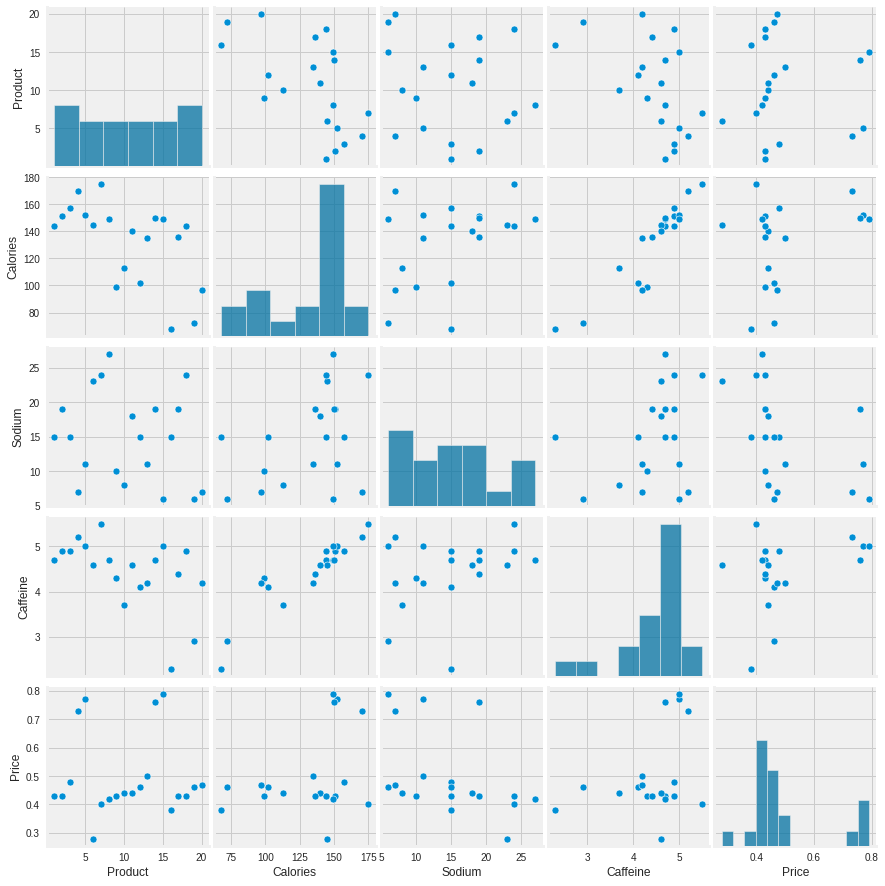

In [237]:
sns.pairplot(Drink)

Pairplot berguna untuk melihat dominasi dari suatu katergori/kelas terhadaps setiap parameter numerik yang ada

Data Exploration (Clustering)

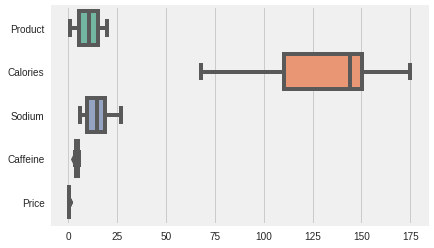

In [238]:
ax=sns.boxplot(data=Drink,orient = "h",palette="Set2")

In [239]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
std_atr=scale.fit_transform(Drink)
std_atr=pd.DataFrame(std_atr,columns=Drink.columns)
print(std_atr)

     Product  Calories    Sodium  Caffeine     Price
0  -1.647509  0.393336  0.007795  0.351095 -0.474604
1  -1.474087  0.630693  0.631369  0.621168 -0.474604
2  -1.300665  0.834143  0.007795  0.621168 -0.117759
3  -1.127243  1.274950 -1.239354  1.026278  1.666465
4  -0.953821  0.664602 -0.615780  0.756205  1.951941
5  -0.780399  0.427244  1.254943  0.216058 -1.545138
6  -0.606977  1.444491  1.410837  1.431387 -0.688711
7  -0.433555  0.562877  1.878518  0.351095 -0.545973
8  -0.260133 -1.132535 -0.771673 -0.189051 -0.474604
9  -0.086711 -0.657820 -1.083460 -0.999270 -0.403235
10  0.086711  0.257703  0.475475  0.216058 -0.403235
11  0.260133 -1.030811  0.007795 -0.459124 -0.260497
12  0.433555  0.088161 -0.615780 -0.324088  0.024979
13  0.606977  0.596785  0.631369  0.351095  1.880572
14  0.780399  0.562877 -1.395248  0.756205  2.094679
15  0.953821 -2.183691  0.007795 -2.889782 -0.831449
16  1.127243  0.122070  0.631369 -0.054015 -0.474604
17  1.300665  0.393336  1.410837  0.621168 -0.

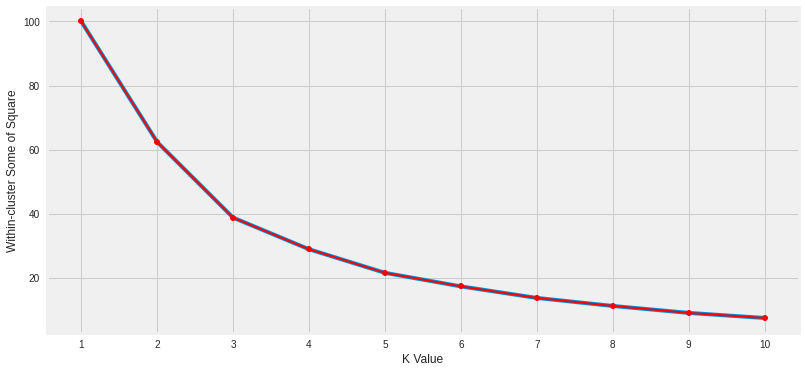

In [240]:
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(std_atr)
  wcss.append(km.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Within-cluster Some of Square")
plt.show()

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9b44fce820>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

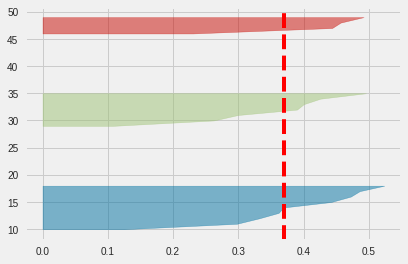

In [272]:
from yellowbrick.cluster import SilhouetteVisualizer
model=KMeans(3,random_state=42)
visualizer=SilhouetteVisualizer(model,colors='yellowbrick')
visualizer.fit(std_atr)

karena n=2 masih ada yg negatif, maka yg tepat adalah n=6

In [273]:
from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=2,random_state=42)
km.fit(std_atr)
score=silhouette_score(std_atr,km.labels_)
print('SilhouetterScore : %.3f' % score)

SilhouetterScore : 0.303


Metode silhouette coefficient merupakan gabungan dari dua metode yaitu metode cohesion yang berfungsi untuk mengukur seberapa dekat relasi antara objek dalam sebuah cluster, dan metode separation yang berfungsi untuk mengukur seberapa jauh sebuah cluster terpisah dengan cluster lain. 

In [274]:
from sklearn.metrics import silhouette_score
k_cluster = []
sil_coeffecients = []

for n_cluster in range(2,15):
  kmeans = KMeans(n_clusters=n_cluster).fit(std_atr)
  label = kmeans.labels_
  sil_coeff = silhouette_score(std_atr, label)
  print("For n_clusters={}, Silhouette coeffecient = {}".format(n_cluster , sil_coeff))
  sil_coeffecients.append(sil_coeff)
  k_cluster.append(n_cluster)

For n_clusters=2, Silhouette coeffecient = 0.30299916248237196
For n_clusters=3, Silhouette coeffecient = 0.3707071590011258
For n_clusters=4, Silhouette coeffecient = 0.3410551645176555
For n_clusters=5, Silhouette coeffecient = 0.3287317600905036
For n_clusters=6, Silhouette coeffecient = 0.3427097030763985
For n_clusters=7, Silhouette coeffecient = 0.34868893661218964
For n_clusters=8, Silhouette coeffecient = 0.3257784768002717
For n_clusters=9, Silhouette coeffecient = 0.31749118708215607
For n_clusters=10, Silhouette coeffecient = 0.29185303803330104
For n_clusters=11, Silhouette coeffecient = 0.2814471425622961
For n_clusters=12, Silhouette coeffecient = 0.220268135850037
For n_clusters=13, Silhouette coeffecient = 0.19981127971694418
For n_clusters=14, Silhouette coeffecient = 0.178159938720866


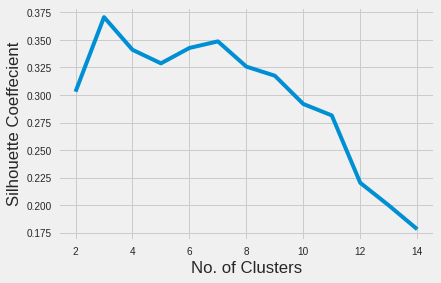

In [275]:
plt.plot(k_cluster,sil_coeffecients)
plt.ylabel('Silhouette Coeffecient')
plt.xlabel('No. of Clusters')
plt.show()

In [276]:
clt=model.labels_
hasil=pd.Series(clt,name="Cluster")
hasil=pd.DataFrame(hasil)

In [277]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
preprocessor=Pipeline([("scaler",StandardScaler()),("pca",PCA(n_components=2,random_state=42)),])
clusterer=Pipeline([("kmeans",KMeans(n_clusters=3,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])
pipe=Pipeline([("preprocessor",preprocessor),("clusterer",clusterer)])
pipe.fit(Drink)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=3, n_init=50,
                                         random_state=42))]))])

In [278]:
preprocessor_data=pipe["preprocessor"].transform(Drink)
predicted_labels=pipe["clusterer"]["kmeans"].labels_

In [279]:
pcadf=pd.DataFrame(pipe["preprocessor"].transform(Drink),columns=["Dim 1","Dim 2"],)
pcadf["predicted_cluster"]=pipe["clusterer"]["kmeans"].labels_

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


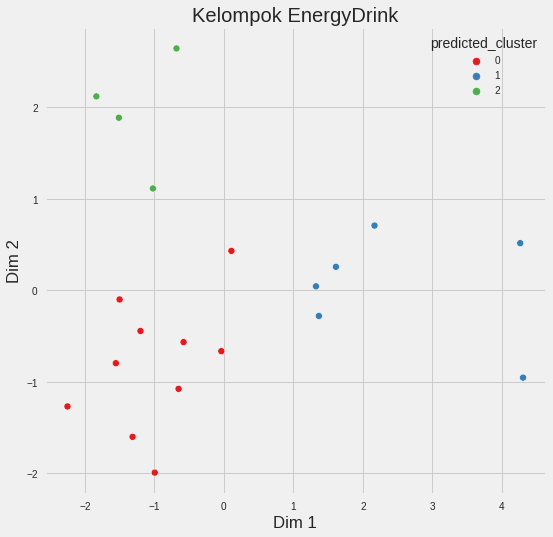

In [280]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
scat=sns.scatterplot("Dim 1","Dim 2", s=50,data=pcadf,hue="predicted_cluster", palette="Set1",)
scat.set_title("Kelompok EnergyDrink")
plt.show()

Clustering Lanjutan

In [282]:
#Clustering the Product into 3 clusters
kmeans = KMeans(n_clusters=3,max_iter=300)
kmeans.fit(Drink)

KMeans(n_clusters=3)

In [281]:
Caffeine_clust = Drink.drop(['Product'],axis=1)
Caffeine_clust.head()

,Calories,Sodium,Caffeine,Price,Cluster_ID
0,144,15,4.7,0.43,0
1,151,19,4.9,0.43,0
2,157,15,4.9,0.48,0
3,170,7,5.2,0.73,0
4,152,11,5.0,0.77,0


In [283]:
Drink['Cluster_ID'] = kmeans.labels_

In [253]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [284]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [293]:
hopkins(Drink)

0.6273754074106738

In [292]:
hopkins(Caffeine_clust)

0.6069486536429054

Hopkins's test is applied to measure cluster tendency and optimal k value. A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

In [294]:
Drink.head()

,Product,Calories,Sodium,Caffeine,Price,Cluster_ID
0,1,144,15,4.7,0.43,0
1,2,151,19,4.9,0.43,0
2,3,157,15,4.9,0.48,0
3,4,170,7,5.2,0.73,0
4,5,152,11,5.0,0.77,0


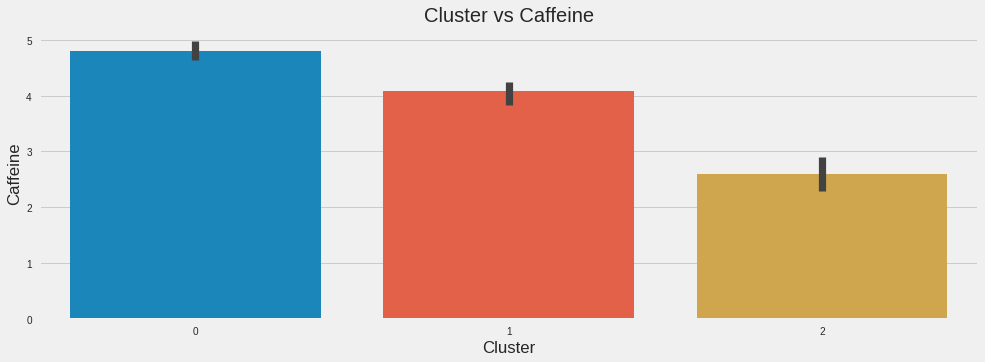

In [295]:
#Plotting the cluster
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Caffeine',data=Drink)
plt.title('Cluster vs Caffeine')
plt.xlabel('Cluster')
plt.ylabel('Caffeine')
plt.show()

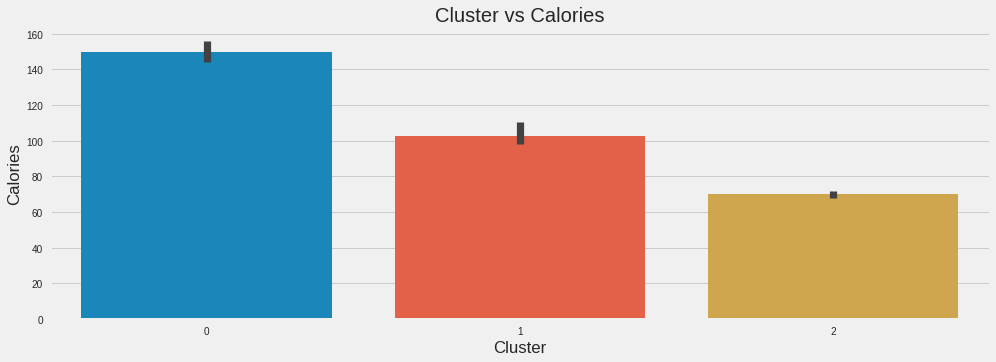

In [298]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Calories',data=Drink)
plt.title('Cluster vs Calories')
plt.xlabel('Cluster')
plt.ylabel('Calories')
plt.show()

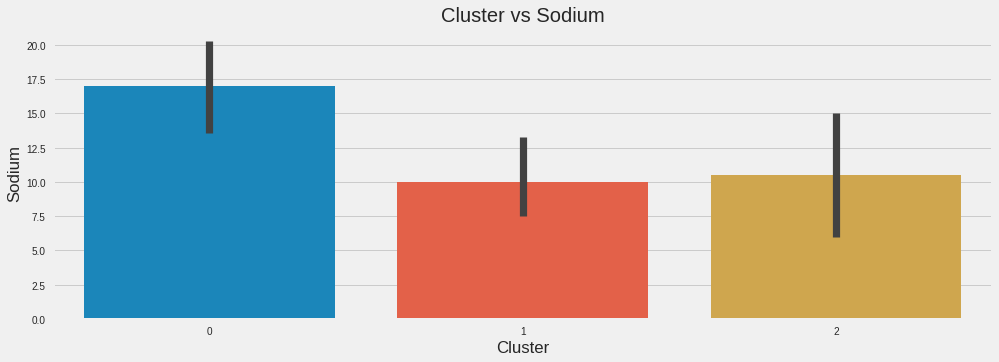

In [297]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Sodium',data=Drink)
plt.title('Cluster vs Sodium')
plt.xlabel('Cluster')
plt.ylabel('Sodium')
plt.show()

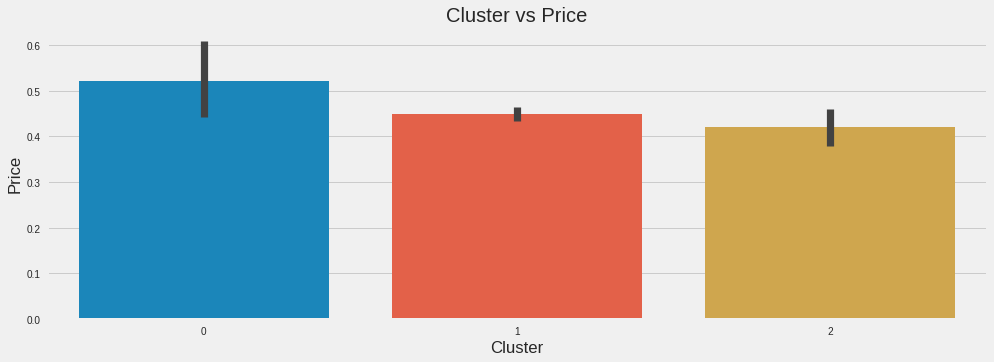

In [299]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='Price',data=Drink)
plt.title('Cluster vs Price')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()

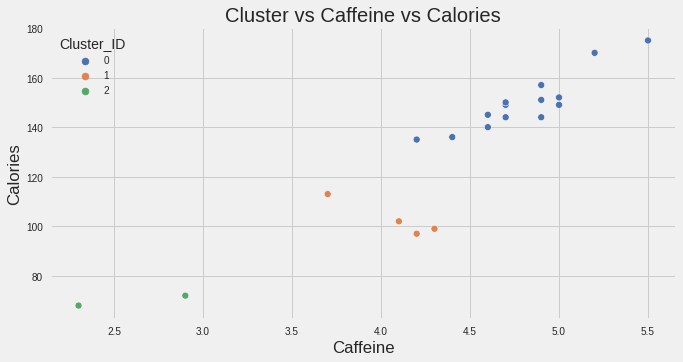

In [305]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Caffeine',y='Calories',hue='Cluster_ID',palette='deep',data=Drink)
plt.title('Cluster vs Caffeine vs Calories')
plt.xlabel('Caffeine')
plt.ylabel('Calories')
plt.show()

In [301]:
print('Cluster 1: ',list(Drink[Drink.Cluster_ID == 0].Product))

Cluster 1:  [1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 14, 15, 17, 18]


In [302]:
print('Cluster 2: ',list(Drink[Drink.Cluster_ID == 1].Product))

Cluster 2:  [9, 10, 12, 20]


In [304]:
print('Cluster 3: ',list(Drink[Drink.Cluster_ID == 2].Product))

Cluster 3:  [16, 19]


Insight nya naratif.  "ternyata minuman yang harganya lebih murah biasanya kalorinya lebih dikit"

 Bikin insight sama clustering, tapi utamain insight nya yang mendalam gitu